      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_29908\2514730285.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


== Decision Tree ==
Accuracy: 0.9119373776908023
Confusion Matrix:
 [[922  38]
 [ 52  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.21      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022


== Random Forest ==
Accuracy: 0.9383561643835616
Confusion Matrix:
 [[959   1]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



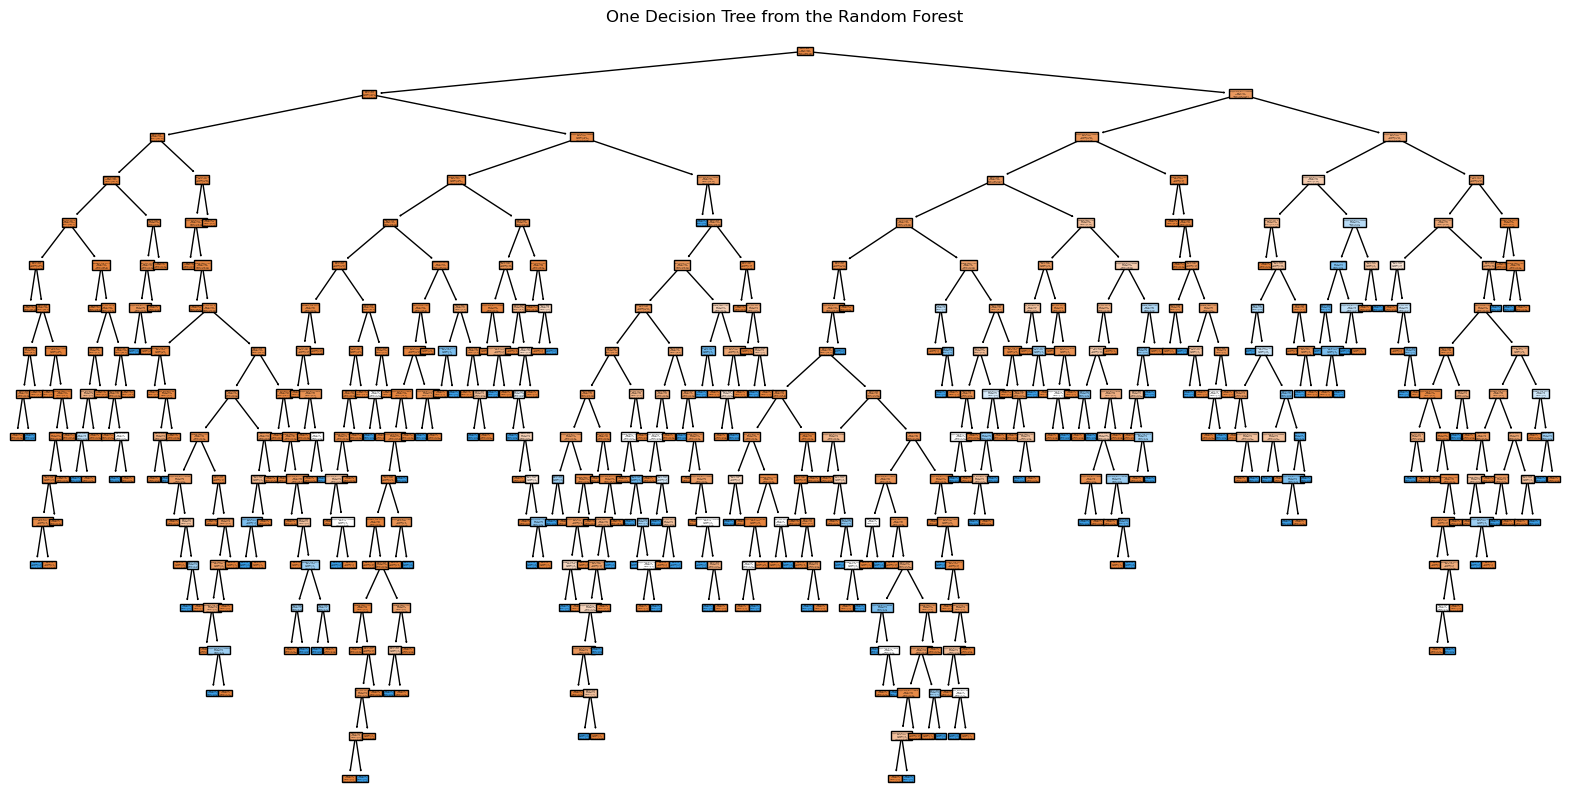

In [10]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
df = pd.read_csv('stroke.csv')  # File from Kaggle

# Step 3: Basic Exploration
print(df.head())
print(df.info())
print(df.isnull().sum())

# Step 4: Handle Missing Data (BMI has missing values)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Step 5: Drop ID column (not useful)
df.drop('id', axis=1, inplace=True)

# Step 6: Encode Categorical Columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 7: Define Features and Target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 10: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 11: Evaluate Both Models
print("== Decision Tree ==")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\n== Random Forest ==")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 12: Optional - Visualize One Random Forest Tree
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=["No Stroke", "Stroke"], filled=True)
plt.title("One Decision Tree from the Random Forest")
plt.show()